In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
#CROPP CODE FOR IMAGE TRAINING
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
%matplotlib inline
import tensorflow as tf
#np.set_printoptions(threshold=np.inf)
from tensorflow import estimator
tf.reset_default_graph()
from sklearn.model_selection import train_test_split
gs = 0
N_CLASSES = 4   
IMG_W = 200      # for better visibility, go with >180
IMG_H = 200
learning_rate = 0.0001     #slow learning rate for better learning
MODEL = './model7'
NUM_EPOCH = 50
BATCH_SIZE = 16
LOOP = 16                # total no. of epoch = loop * 2*num_epoch
disease ={0:'Healthy', 
          1:'Mosaic_Virus', 
          2:'rust', 
          3:'woolyaphids'}       
def normalize(df):    
    return (df - df.min()) / (df.max() - df.min())
def denormalize(df,norm_data):    
    return (norm_data * (df.max() - df.min())) + df.min()

C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\D

In [2]:
def getdata(path):
    ''' returns shuffled array of image file path and labels of corresponding file '''
    woolyaphids = []
    woolyaphids_l= []
    Healthy = []
    Healthy_l = []
    Mosaic_Virus = []
    Mosaic_Virus_l = []
    rust = []
    rust_l = []
    for file in os.listdir(path):
        name=file.split(sep='.')
        if 'healthy' in name[0]:
            Healthy.append(path+file)
            Healthy_l.append(0)
        elif 'Mosaic_Virus' in name[0]:
            Mosaic_Virus.append(path+file)
            Mosaic_Virus_l.append(1)
        elif 'mosaic_virus' in name[0]:
            Mosaic_Virus.append(path+file)
            Mosaic_Virus_l.append(1)
        elif 'rust' in name[0]:
            rust.append(path+file)
            rust_l.append(2)
        elif 'Woolyaphids' in name[0]:
            woolyaphids.append(path+file)
            woolyaphids_l.append(3)
        elif 'woolyaphids' in name[0]:
            woolyaphids.append(path+file)
            woolyaphids_l.append(3)
            
    image_list = np.hstack((Healthy, Mosaic_Virus, rust, woolyaphids ))
    label_list = np.hstack(( Healthy_l, Mosaic_Virus_l, rust_l, woolyaphids_l))
    temp = np.array([image_list, label_list])
    temp = temp.transpose()
    #shuffle whole files and labels respectively
    np.random.shuffle(temp)
    image_list = list(temp[:, 0])
    label_list = list(temp[:, 1])
    label_list = [int(i) for i in label_list]
    print("Healthy plant is: ", len(Healthy))
    print("Rust disease plant is: ", len(rust))
    print("Mosaic_Virus plant is: ", len(Mosaic_Virus))
    print("Woolyaphids plant is: ", len(Mosaic_Virus))
    return image_list, label_list

def process(path):
    '''this function takes file paths from getdata function, 
it reads and processes image file in 4D tensor format i.e.
[batch_size, IMG_Width, IMG_Height, channel]   for grayscale channel = 1, for RGB, channel = 3
'''
    a, train_labels = getdata(path)
    img = []
    batch=len(a)
    for i in range(batch):
        im = cv2.imread(a[i], cv2.IMREAD_COLOR) 
        b,g,r = cv2.split(im)
        image = cv2.merge([r,g,b])
        res = cv2.resize(image,(IMG_W, IMG_H), interpolation = cv2.INTER_CUBIC)
        img.append(res)
        if i%50 == 0: print('Processed {} of {}'.format(i, batch))
    print("finished\nCount of Images is ",len(img),"with input shape",res.shape)
    return np.array(img, dtype=np.int32), np.array(train_labels[:batch], dtype = np.int32)


In [3]:
path = 'C:\\Users\\DEEPANSHU SONPAROTE\\Kaggle\\Untitled Folder\\Data\\disease\\input\\'
X, Y = process(path)

Healthy plant is:  610
Rust disease plant is:  430
Mosaic_Virus plant is:  562
Woolyaphids plant is:  562
Processed 0 of 1987
Processed 50 of 1987
Processed 100 of 1987
Processed 150 of 1987
Processed 200 of 1987
Processed 250 of 1987
Processed 300 of 1987
Processed 350 of 1987
Processed 400 of 1987
Processed 450 of 1987
Processed 500 of 1987
Processed 550 of 1987
Processed 600 of 1987
Processed 650 of 1987
Processed 700 of 1987
Processed 750 of 1987
Processed 800 of 1987
Processed 850 of 1987
Processed 900 of 1987
Processed 950 of 1987
Processed 1000 of 1987
Processed 1050 of 1987
Processed 1100 of 1987
Processed 1150 of 1987
Processed 1200 of 1987
Processed 1250 of 1987
Processed 1300 of 1987
Processed 1350 of 1987
Processed 1400 of 1987
Processed 1450 of 1987
Processed 1500 of 1987
Processed 1550 of 1987
Processed 1600 of 1987
Processed 1650 of 1987
Processed 1700 of 1987
Processed 1750 of 1987
Processed 1800 of 1987
Processed 1850 of 1987
Processed 1900 of 1987
Processed 1950 of 19

In [32]:
pwd

'C:\\Users\\DEEPANSHU SONPAROTE\\Kaggle\\Untitled Folder'

In [4]:
data = []
for i in X:
    data.append(i.reshape(IMG_W*IMG_H*3))
data = np.array(data)

In [5]:
print('shape of whole data and their labels are as follows',data.shape,'and',Y.shape,"respectively")

shape of whole data and their labels are as follows (1987, 120000) and (1987,) respectively


actually it is: Mosaic_Virus


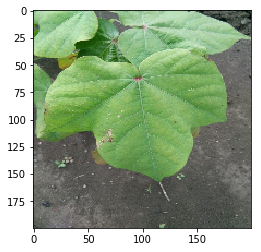

actually it is: Mosaic_Virus


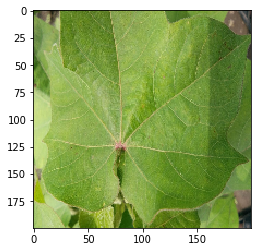

actually it is: Mosaic_Virus


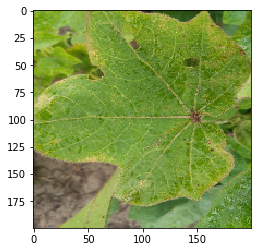

actually it is: Mosaic_Virus


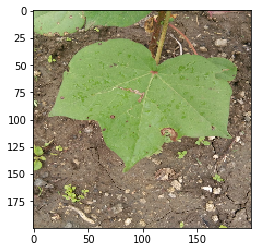

actually it is: Healthy


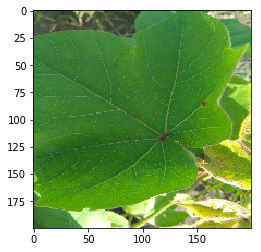

actually it is: rust


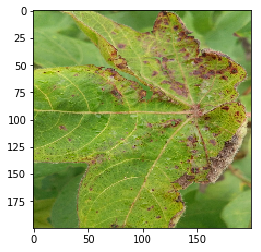

actually it is: rust


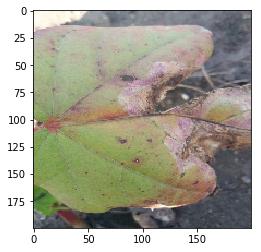

actually it is: Healthy


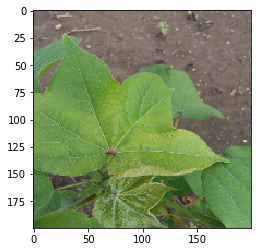

actually it is: Mosaic_Virus


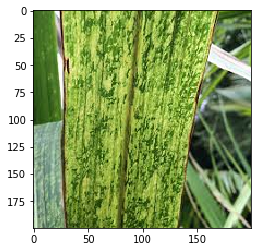

actually it is: rust


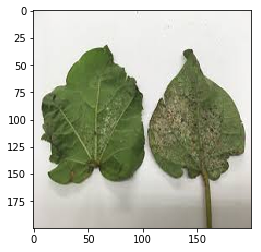

In [6]:
for i in range(170, 180):
    j =data[i].reshape(IMG_W,IMG_H,3)
    print("actually it is:",disease[Y[i]])
    plt.imshow(j)
    plt.show()  
#this cell is used to ensure proper labelling of image

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(data ,Y, test_size=0.3, random_state=1)

In [8]:
X_tr = []
for i in X_train:
    X_tr.append(normalize(i))
X_tr = np.array(X_tr)

X_v = []
for i in X_val:
    X_v.append(normalize(i))
X_v = np.array(X_v)

In [9]:
feat_cols=[tf.feature_column.numeric_column('x', shape=[IMG_H*IMG_W*3])]

In [10]:
deep_model = tf.estimator.DNNClassifier(feature_columns=feat_cols, 
                                      n_classes=N_CLASSES,
                                      hidden_units=[100, 100, 100, 100, 100,50], 
                                      activation_fn=tf.nn.leaky_relu,
                                      optimizer=tf.train.GradientDescentOptimizer(learning_rate),
                                      model_dir=MODEL)

In [11]:
input_fn = estimator.inputs.numpy_input_fn(x={'x':np.array(X_tr)}, 
                                           y=np.array(Y_train),
                                           shuffle= True,
                                           num_epochs=NUM_EPOCH,
                                           batch_size=BATCH_SIZE)

In [12]:
input_fn_eval = estimator.inputs.numpy_input_fn(x = {'x':np.array(X_v)},
                                                y = Y_val,
                                                shuffle=False)

In [13]:
for i in range(LOOP):
    gs = gs + NUM_EPOCH*2
    train_spec = tf.estimator.TrainSpec(input_fn = input_fn, max_steps = gs)
    eval_spec  = tf.estimator.EvalSpec(input_fn = input_fn_eval)
    tf.estimator.train_and_evaluate(deep_model, train_spec, eval_spec)
    print("*************************************************************************************** step = ", i)

W0926 11:13:39.831615  5664 deprecation.py:323] From C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0926 11:13:41.486666  5664 deprecation.py:323] From C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0926 11:13:41.508654  5664 deprecation.py:323] From C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tens

*************************************************************************************** step =  0


W0926 11:14:37.323185  5664 deprecation.py:323] From C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\saver.py:1066: get_checkpoint_mtimes (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file utilities to get mtimes.


*************************************************************************************** step =  1
*************************************************************************************** step =  2
*************************************************************************************** step =  3


W0926 11:16:01.429738  5664 deprecation.py:323] From C:\Users\DEEPANSHU SONPAROTE\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


*************************************************************************************** step =  4
*************************************************************************************** step =  5
*************************************************************************************** step =  6
*************************************************************************************** step =  7
*************************************************************************************** step =  8
*************************************************************************************** step =  9
*************************************************************************************** step =  10
*************************************************************************************** step =  11
*************************************************************************************** step =  12
*************************************************************************************** step =  13
****************

In [14]:
input_fn_eval = estimator.inputs.numpy_input_fn( x = {'x':X_v},
                                                shuffle = False)

preds=deep_model.predict(input_fn=input_fn_eval)

In [15]:
predictions = [p['class_ids'][0] for p in preds]

In [16]:
pred = np.asarray(predictions)

prediction is: woolyaphids 
actually it is: woolyaphids


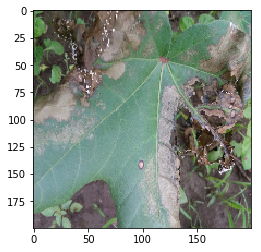

prediction is: woolyaphids 
actually it is: woolyaphids


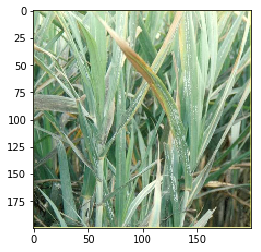

prediction is: Healthy 
actually it is: Healthy


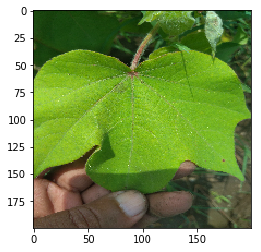

prediction is: Healthy 
actually it is: Healthy


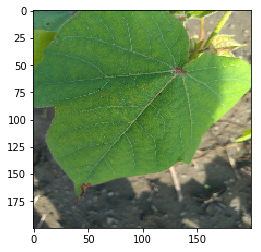

prediction is: Mosaic_Virus 
actually it is: Mosaic_Virus


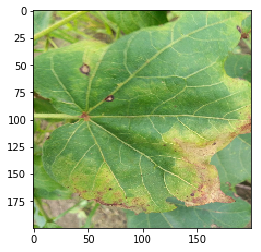

prediction is: rust 
actually it is: Mosaic_Virus


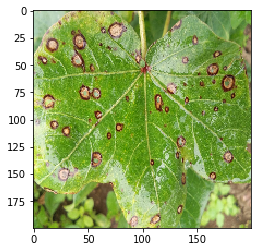

prediction is: Healthy 
actually it is: rust


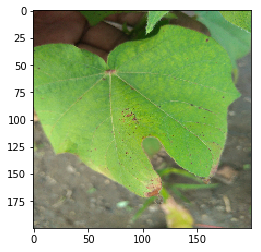

prediction is: Healthy 
actually it is: Healthy


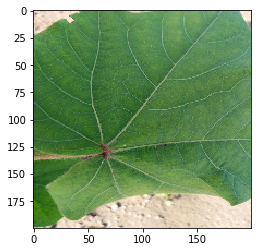

prediction is: Mosaic_Virus 
actually it is: Mosaic_Virus


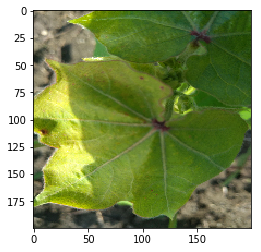

prediction is: Healthy 
actually it is: Healthy


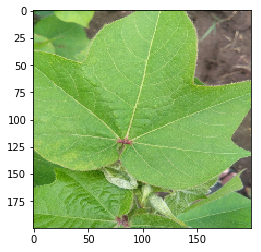

In [17]:
for i in range(17,27):
    j = X_v[i].reshape(IMG_W,IMG_H,3)
    print("prediction is:", disease[pred[i]],"\nactually it is:",disease[Y_val[i]])
    plt.imshow(j)
    plt.show()   


In [18]:
f = pred == Y_val
print(len(f))
T = len(f[f == True])
F = len(f[f == False])
print(T, F, T+F)
error = F/(T+F) * 100
print(error)

597
331 266 597
44.55611390284757
